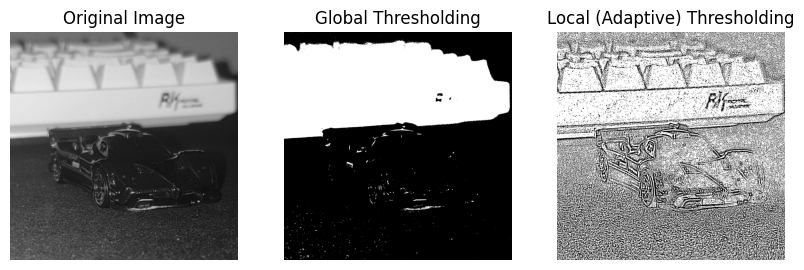

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
    _, global_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # nothing wrong here,  just increased the kernel size from 11 to 17 to better fit my image
    local_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 19, 2)
    titles = ['Original Image', 'Global Thresholding', 'Local (Adaptive) Thresholding']
    images = [image, global_thresh, local_thresh]
    plt.figure(figsize=(10, 5))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.show()
# dunder namespace is normal for .py files, but not necessary in jupyter (.ipynb) notebooks
if __name__ == "__main__":
    main()




In [52]:
import cv2
import numpy as np
def edge_segmentation(image_path):

    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    # added a resizable window so the image does not get cropped out
    cv2.namedWindow('Original Image', cv2.WINDOW_FREERATIO)
    cv2.namedWindow('Edge Segmentation', cv2.WINDOW_FREERATIO)
    cv2.imshow('Original Image', image)
    cv2.imshow('Edge Segmentation', edges)

    cv2.waitKey()
    cv2.destroyAllWindows()

image_path = 'image.jpg'
edge_segmentation(image_path)

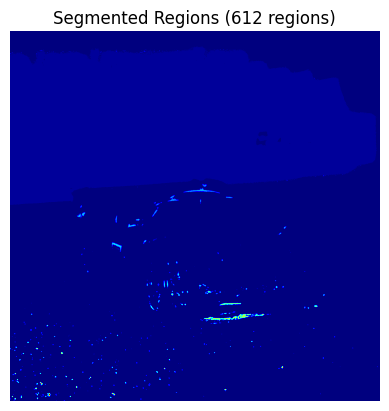

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def region_based_segmentation(image_path):
    image = cv2.imread(image_path, 0)
    _, binary = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)
    num_labels, labels = cv2.connectedComponents(binary)
    plt.imshow(labels, cmap='jet')
    plt.title(f'Segmented Regions ({num_labels} regions)')
    plt.axis('off')
    plt.show()

image_path = 'image.jpg' 
region_based_segmentation(image_path)


<h3>
    Task 4: Reflection
</h3>

<ol>
    <li>
    The errors in the code are minimal, primarily consisting of adjustments and adherence to best practices. I explained these changes in the code comments.
    </li>
    <br><br>
    <br><br>
    <li>
    Global Thresholding applies a single threshold value to the entire image, turning all pixels as either black or white. Although it is fast to compute, it fails in images with varying illumination or shaadows. This is evident in my use case, where it falsely detected the keyboard instead of the car. In real life, it is used for barcode reading and documment scanning.
    <br><br>
    Local thresholding computes a threshold for each small region of the image, rather than one for the whole. Although it is slower to compute, it handles uneven lighting and shadows better. In my use case, it handled the outlines the best among all algorithms, despite the image being aa bit noisy. In real life, it is used in outdoor settings such as license plate recognition and handwritten text extraction.  
    </li>
    <br><br>
    <br><br>
    <li>
    The answer to the question depends on your use case. In my use case, Local Thresholding and Region Based Segmentation produced the most complete outline of the car - the uneven lighting and contrast makes it difficult for global thresholding and edge segmentation. In real life, it is impossible to predict for certain and the only way to know for sure is to test it out yourself.
    </li>
</ol>